### Loading data_train.csv

1 full set, 1 feature selected

In [40]:
import pandas as pd
import keras
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split

from google.colab import files
uploaded = files.upload()

Saving tweetsFeatures2.csv to tweetsFeatures2.csv


In [42]:
import io
data = pd.read_csv(io.BytesIO(uploaded['tweetsFeatures2.csv']))
data

,Unnamed: 0,CountyOutcome,White (Not Latino) Population,African American Population,Native American Population,Asian American Population,Other Race or Races,Latino Population,Gini.Coefficient,Management.professional.and.related.occupations,Production.transportation.and.material.moving.occupations,Poor.physical.health.days,Poor.mental.health.days,Low.birthweight,Teen.births,Children.in.single.parent.households,Adult.smoking,Adult.obesity,Diabetes,Sexually.transmitted.infections,Uninsured,Violent.crime,tSentiment,cSentiment
0,0,1,0.831954,0.004646,0.083650,0.005855,0.108392,0.026248,0.463470,0.552174,0.114286,0.224719,0.109890,0.356684,0.319198,0.249047,0.229167,0.474138,0.310559,0.058300,0.585082,0.271977,-0.052888,0.107653
1,1,1,0.398656,0.001742,0.425312,0.067916,0.256119,0.022131,0.388128,0.473913,0.106960,0.306081,0.281801,0.356684,0.319198,0.426938,0.378701,0.531609,0.329193,0.116776,0.645688,0.129210,-0.052888,0.107653
2,2,1,0.095657,0.095819,0.243889,0.970726,0.090909,0.112198,0.438356,0.000000,1.000000,0.202247,0.307692,0.356684,0.463975,0.500635,0.731250,0.551724,0.273292,0.090651,1.000000,0.129210,-0.052888,0.107653
3,3,1,0.634436,0.009292,0.210212,0.083138,0.131119,0.050437,0.408676,0.498261,0.099634,0.224719,0.164835,0.133333,0.182898,0.402795,0.379167,0.433908,0.260870,0.130144,0.517483,0.125592,-0.052888,0.107653
4,4,1,0.701655,0.002323,0.158066,0.069087,0.177448,0.018013,0.349315,0.490435,0.171429,0.306081,0.281801,0.356684,0.319198,0.401399,0.378701,0.501554,0.460293,0.116776,0.347015,0.129210,-0.052888,0.107653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,3137,1,0.251293,0.000000,0.020641,0.316159,1.000000,0.005661,0.221461,0.771304,0.060073,0.306081,0.281801,0.356684,0.319198,0.401399,0.378701,0.324713,0.509317,0.116776,0.347015,0.129210,-0.045793,0.123133
3138,3138,0,0.307135,0.005807,0.002716,0.526932,0.576923,0.118374,0.573059,0.350435,0.091575,0.247191,0.241758,0.333333,0.326207,0.505718,0.325000,0.316092,0.304348,0.101141,0.174825,0.134302,-0.045793,0.123133
3139,3139,0,0.316443,0.005807,0.001630,0.638173,0.506993,0.101904,0.511416,0.338261,0.101832,0.235955,0.208791,0.333333,0.287411,0.434562,0.256250,0.293103,0.329193,0.106294,0.153846,0.109794,-0.045793,0.123133
3140,3140,0,0.296277,0.005807,0.001630,0.723653,0.483392,0.099846,0.490868,0.353913,0.098901,0.224719,0.208791,0.333333,0.312747,0.350699,0.262500,0.247126,0.329193,0.047663,0.163170,0.175211,-0.045793,0.123133


In [43]:
from sklearn.model_selection import train_test_split

num_classes=2
y=data['CountyOutcome'].values.tolist()
y = keras.utils.to_categorical(y, num_classes)
X = data.drop(['CountyOutcome','Unnamed: 0'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle =True, random_state=4221)
print("X_train shape {}, X_test shape {}, y_train shape {}, y_test shape {}".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

X_train shape (2199, 22), X_test shape (943, 22), y_train shape (2199, 2), y_test shape (943, 2)


### Keras Model Tuning using scikit_learn

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras import regularizers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

### Part 1: Tune Batch Size and Number of Epochs

In [ ]:
def create_model():
    model = Sequential()
    
    model.add(Dense(20, input_shape=(22,), kernel_regularizer = regularizers.l2(0.0001), activation='relu'))
    model.add(Dense(20, kernel_regularizer = regularizers.l2(0.0001), activation='relu'))
    model.add(Dense(num_classes,  kernel_regularizer = regularizers.l2(0.0001), activation='sigmoid'))
    
    model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])
    
    return model


model = KerasClassifier(build_fn=create_model)
batch_sizes = [10, 20, 40, 60]
epochs = [10, 20, 30, 40]
parameters = {'batch_size': batch_sizes, 'epochs': epochs}
clf = GridSearchCV(model, parameters)
clf.fit(X_train, y_train)

Epoch 1/10
176/176 [==============================] - 0s 1ms/step - loss: 0.5003 - accuracy: 0.8266
Epoch 2/10
176/176 [==============================] - 0s 1ms/step - loss: 0.3543 - accuracy: 0.8488
Epoch 3/10
176/176 [==============================] - 0s 1ms/step - loss: 0.2784 - accuracy: 0.8857
Epoch 4/10
176/176 [==============================] - 0s 1ms/step - loss: 0.2371 - accuracy: 0.9136
Epoch 5/10
176/176 [==============================] - 0s 1ms/step - loss: 0.2158 - accuracy: 0.9215
Epoch 6/10
176/176 [==============================] - 0s 1ms/step - loss: 0.2028 - accuracy: 0.9250
Epoch 7/10
176/176 [==============================] - 0s 1ms/step - loss: 0.1977 - accuracy: 0.9284
Epoch 8/10
176/176 [==============================] - 0s 1ms/step - loss: 0.1962 - accuracy: 0.9267
Epoch 9/10
176/176 [==============================] - 0s 1ms/step - loss: 0.1909 - accuracy: 0.9244
Epoch 10/10
44/44 [==============================] - 0s 822us/step - loss: 0.1720 - accuracy: 0.9341

GridSearchCV(cv=None, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f614551d0f0>,
             iid='deprecated', n_jobs=None,
             param_grid={'batch_size': [10, 20, 40, 60],
                         'epochs': [10, 20, 30, 40]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
means = clf.cv_results_['mean_test_score']
parameters = clf.cv_results_['params']
for mean, parammeter in zip(means, parameters):
    print(mean, parammeter)

0.9290567517280579 {'batch_size': 10, 'epochs': 10}
0.9295123219490051 {'batch_size': 10, 'epochs': 20}
0.9349689364433289 {'batch_size': 10, 'epochs': 30}
0.9386052966117859 {'batch_size': 10, 'epochs': 40}
0.9245123267173767 {'batch_size': 20, 'epochs': 10}
0.9308759570121765 {'batch_size': 20, 'epochs': 20}
0.934517502784729 {'batch_size': 20, 'epochs': 30}
0.9381528258323669 {'batch_size': 20, 'epochs': 40}
0.9199658513069153 {'batch_size': 40, 'epochs': 10}
0.9281497240066529 {'batch_size': 40, 'epochs': 20}
0.928603219985962 {'batch_size': 40, 'epochs': 30}
0.9349689364433289 {'batch_size': 40, 'epochs': 40}
0.9058593869209289 {'batch_size': 60, 'epochs': 10}
0.922238576412201 {'batch_size': 60, 'epochs': 20}
0.9226889729499816 {'batch_size': 60, 'epochs': 30}
0.9295143961906434 {'batch_size': 60, 'epochs': 40}


In [ ]:
print(clf.best_score_, clf.best_params_)

0.9386052966117859 {'batch_size': 10, 'epochs': 40}


### Part 2: Tune the Training Optimization Algorithm

In [ ]:
def create_model(optimizer):
    model = Sequential()
    
    model.add(Dense(20, input_shape=(22,), kernel_regularizer = regularizers.l2(0.0001), activation='relu'))
    model.add(Dense(20, kernel_regularizer = regularizers.l2(0.0001), activation='relu'))
    model.add(Dense(num_classes,  kernel_regularizer = regularizers.l2(0.0001), activation='sigmoid'))
    
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=['accuracy'])
    
    return model

model = KerasClassifier(build_fn=create_model, epochs=40, batch_size=10)
parameters = {'optimizer':['SGD', 'RMSprop','Adam', 'Adamax']}
clf = GridSearchCV(model, parameters)
clf.fit(X_train, y_train)

Epoch 1/40
176/176 [==============================] - 0s 922us/step - loss: 0.6246 - accuracy: 0.6970
Epoch 2/40
176/176 [==============================] - 0s 981us/step - loss: 0.4626 - accuracy: 0.8459
Epoch 3/40
176/176 [==============================] - 0s 908us/step - loss: 0.4238 - accuracy: 0.8459
Epoch 4/40
176/176 [==============================] - 0s 929us/step - loss: 0.4151 - accuracy: 0.8459
Epoch 5/40
176/176 [==============================] - 0s 1ms/step - loss: 0.4096 - accuracy: 0.8459
Epoch 6/40
176/176 [==============================] - 0s 916us/step - loss: 0.4037 - accuracy: 0.8459
Epoch 7/40
176/176 [==============================] - 0s 948us/step - loss: 0.3974 - accuracy: 0.8459
Epoch 8/40
176/176 [==============================] - 0s 943us/step - loss: 0.3906 - accuracy: 0.8459
Epoch 9/40
176/176 [==============================] - 0s 909us/step - loss: 0.3825 - accuracy: 0.8459
Epoch 10/40
176/176 [==============================] - 0s 936us/step - loss: 0.3741 

GridSearchCV(cv=None, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f61373aad30>,
             iid='deprecated', n_jobs=None,
             param_grid={'optimizer': ['SGD', 'RMSprop', 'Adam', 'Adamax']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
means = clf.cv_results_['mean_test_score']
parameters = clf.cv_results_['params']
for mean, parammeter in zip(means, parameters):
    print(mean, parammeter)

0.9240577816963196 {'optimizer': 'SGD'}
0.9322375297546387 {'optimizer': 'RMSprop'}
0.9390619158744812 {'optimizer': 'Adam'}
0.9317891955375671 {'optimizer': 'Adamax'}


In [ ]:
print(clf.best_score_, clf.best_params_)

0.9390619158744812 {'optimizer': 'Adam'}


### Part 3: Tune Learning Rate and Momentum

Adam is an adaptive learning rate method which takes away the need to adjust learning rate, and does it automatically. Therefore we do not tune our learning rate.

### Part 4: Tune Network Weight Initialization

In [ ]:
def create_model(init_mode='uniform'):
    model = Sequential()
    
    model.add(Dense(20, input_shape=(22,), kernel_regularizer = regularizers.l2(0.0001), kernel_initializer=init_mode, activation='relu'))
    model.add(Dense(20, kernel_regularizer = regularizers.l2(0.0001), kernel_initializer=init_mode, activation='relu'))
    model.add(Dense(num_classes,  kernel_regularizer = regularizers.l2(0.0001), activation='sigmoid'))
    
    model.compile(loss="binary_crossentropy", optimizer='Adam', metrics=['accuracy'])
    
    return model

model = KerasClassifier(build_fn=create_model, epochs=40, batch_size=10)
parameters = {'init_mode':['uniform', 'lecun_uniform', 'normal','glorot_uniform']}
clf = GridSearchCV(model, parameters)
clf.fit(X_train, y_train)

Epoch 1/40
176/176 [==============================] - 0s 1ms/step - loss: 0.4833 - accuracy: 0.8454
Epoch 2/40
176/176 [==============================] - 0s 1ms/step - loss: 0.3529 - accuracy: 0.8459
Epoch 3/40
176/176 [==============================] - 0s 1ms/step - loss: 0.2841 - accuracy: 0.8459
Epoch 4/40
176/176 [==============================] - 0s 1ms/step - loss: 0.2586 - accuracy: 0.8675
Epoch 5/40
176/176 [==============================] - 0s 1ms/step - loss: 0.2444 - accuracy: 0.9079
Epoch 6/40
176/176 [==============================] - 0s 1ms/step - loss: 0.2346 - accuracy: 0.9142
Epoch 7/40
176/176 [==============================] - 0s 1ms/step - loss: 0.2283 - accuracy: 0.9147
Epoch 8/40
176/176 [==============================] - 0s 1ms/step - loss: 0.2247 - accuracy: 0.9164
Epoch 9/40
176/176 [==============================] - 0s 1ms/step - loss: 0.2242 - accuracy: 0.9187
Epoch 10/40
176/176 [==============================] - 0s 1ms/step - loss: 0.2161 - accuracy: 0.9221

GridSearchCV(cv=None, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f61376c5128>,
             iid='deprecated', n_jobs=None,
             param_grid={'init_mode': ['uniform', 'lecun_uniform', 'normal',
                                       'glorot_uniform']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
means = clf.cv_results_['mean_test_score']
parameters = clf.cv_results_['params']
for mean, parammeter in zip(means, parameters):
    print(mean, parammeter)

0.9276900053024292 {'init_mode': 'uniform'}
0.9372447729110718 {'init_mode': 'lecun_uniform'}
0.9272427082061767 {'init_mode': 'normal'}
0.9404245138168335 {'init_mode': 'glorot_uniform'}


In [ ]:
print(clf.best_score_, clf.best_params_)

0.9404245138168335 {'init_mode': 'glorot_uniform'}


### Part 5: Tune the Neuron Activation Function

In [ ]:
def create_model(activation):
    model = Sequential()
    
    model.add(Dense(20, input_shape=(22,), kernel_regularizer = regularizers.l2(0.0001), kernel_initializer='glorot_uniform' ,activation=activation))
    model.add(Dense(20, kernel_regularizer = regularizers.l2(0.0001), kernel_initializer='glorot_uniform' ,activation=activation))
    
    #Note we leave activation for output as sigmoid as we want the probabilities for a binary output label
    model.add(Dense(num_classes,  kernel_regularizer = regularizers.l2(0.0001),activation='sigmoid'))
    model.compile(loss="binary_crossentropy", optimizer='Adam', metrics=['accuracy'])
    
    return model

model = KerasClassifier(build_fn=create_model, epochs=40, batch_size=10)
parameters = {'activation':['softmax', 'softplus','relu', 'tanh', 'sigmoid']}
clf = GridSearchCV(model, parameters)
clf.fit(X_train, y_train)

Epoch 1/40
176/176 [==============================] - 0s 1ms/step - loss: 0.6447 - accuracy: 0.7891
Epoch 2/40
176/176 [==============================] - 0s 1ms/step - loss: 0.5505 - accuracy: 0.8459
Epoch 3/40
176/176 [==============================] - 0s 1ms/step - loss: 0.4932 - accuracy: 0.8459
Epoch 4/40
176/176 [==============================] - 0s 1ms/step - loss: 0.4611 - accuracy: 0.8459
Epoch 5/40
176/176 [==============================] - 0s 1ms/step - loss: 0.4448 - accuracy: 0.8459
Epoch 6/40
176/176 [==============================] - 0s 1ms/step - loss: 0.4359 - accuracy: 0.8459
Epoch 7/40
176/176 [==============================] - 0s 1ms/step - loss: 0.4282 - accuracy: 0.8459
Epoch 8/40
176/176 [==============================] - 0s 1ms/step - loss: 0.4198 - accuracy: 0.8459
Epoch 9/40
176/176 [==============================] - 0s 1ms/step - loss: 0.4108 - accuracy: 0.8459
Epoch 10/40
176/176 [==============================] - 0s 1ms/step - loss: 0.3998 - accuracy: 0.8459

GridSearchCV(cv=None, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f613e412b00>,
             iid='deprecated', n_jobs=None,
             param_grid={'activation': ['softmax', 'softplus', 'relu', 'tanh',
                                        'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
means = clf.cv_results_['mean_test_score']
parameters = clf.cv_results_['params']
for mean, parammeter in zip(means, parameters):
    print(mean, parammeter)

0.9176920771598815 {'activation': 'softmax'}
0.9263274073600769 {'activation': 'softplus'}
0.9367840170860291 {'activation': 'relu'}
0.9295102596282959 {'activation': 'tanh'}
0.9195092201232911 {'activation': 'sigmoid'}


In [ ]:
print(clf.best_score_, clf.best_params_)

0.9367840170860291 {'activation': 'relu'}


### Part 6: Tune Dropout Regularization

In [ ]:
from keras.constraints import maxnorm
def create_model(dropout_rate=0.0, weight_constraint=0):
    model = Sequential()
    
    model.add(Dense(20, input_shape=(22,), kernel_regularizer = regularizers.l2(0.0001), kernel_constraint=maxnorm(weight_constraint),kernel_initializer='glorot_uniform' , activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(20, kernel_regularizer = regularizers.l2(0.0001), kernel_constraint=maxnorm(weight_constraint), kernel_initializer='glorot_uniform' ,activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(num_classes,  kernel_regularizer = regularizers.l2(0.0001), activation='sigmoid'))
    model.compile(loss="binary_crossentropy", optimizer='Adam', metrics=['accuracy'])
    
    return model

model = KerasClassifier(build_fn=create_model, epochs=40, batch_size=10)
parameters = {'dropout_rate':[0.0, 0.1, 0.2, 0.3, 0.4, 0.5], 'weight_constraint':[1, 2, 3, 4, 5]}
clf = GridSearchCV(model, parameters)
clf.fit(X_train, y_train)

Streaming output truncated to the last 5000 lines.
176/176 [==============================] - 0s 2ms/step - loss: 0.2283 - accuracy: 0.9182
Epoch 12/40
176/176 [==============================] - 0s 2ms/step - loss: 0.2149 - accuracy: 0.9199
Epoch 13/40
176/176 [==============================] - 0s 2ms/step - loss: 0.2068 - accuracy: 0.9210
Epoch 14/40
176/176 [==============================] - 0s 2ms/step - loss: 0.2079 - accuracy: 0.9205
Epoch 15/40
176/176 [==============================] - 0s 2ms/step - loss: 0.2046 - accuracy: 0.9290
Epoch 16/40
176/176 [==============================] - 0s 2ms/step - loss: 0.1991 - accuracy: 0.9273
Epoch 17/40
176/176 [==============================] - 0s 2ms/step - loss: 0.2056 - accuracy: 0.9239
Epoch 18/40
176/176 [==============================] - 0s 2ms/step - loss: 0.1943 - accuracy: 0.9244
Epoch 19/40
176/176 [==============================] - 0s 2ms/step - loss: 0.2003 - accuracy: 0.9250
Epoch 20/40
176/176 [==============================]

GridSearchCV(cv=None, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f613992a438>,
             iid='deprecated', n_jobs=None,
             param_grid={'dropout_rate': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
                         'weight_constraint': [1, 2, 3, 4, 5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
means = clf.cv_results_['mean_test_score']
parameters = clf.cv_results_['params']
for mean, parammeter in zip(means, parameters):
    print(mean, parammeter)

0.9336032271385193 {'dropout_rate': 0.0, 'weight_constraint': 1}
0.9326931118965149 {'dropout_rate': 0.0, 'weight_constraint': 2}
0.9399678945541382 {'dropout_rate': 0.0, 'weight_constraint': 3}
0.9372426986694335 {'dropout_rate': 0.0, 'weight_constraint': 4}
0.9413387894630432 {'dropout_rate': 0.0, 'weight_constraint': 5}
0.9336042642593384 {'dropout_rate': 0.1, 'weight_constraint': 1}
0.9404255509376526 {'dropout_rate': 0.1, 'weight_constraint': 2}
0.9404286623001099 {'dropout_rate': 0.1, 'weight_constraint': 3}
0.9363387942314148 {'dropout_rate': 0.1, 'weight_constraint': 4}
0.9363377571105957 {'dropout_rate': 0.1, 'weight_constraint': 5}
0.93724684715271 {'dropout_rate': 0.2, 'weight_constraint': 1}
0.9372426986694335 {'dropout_rate': 0.2, 'weight_constraint': 2}
0.9395164608955383 {'dropout_rate': 0.2, 'weight_constraint': 3}
0.9417922973632813 {'dropout_rate': 0.2, 'weight_constraint': 4}
0.9395185351371765 {'dropout_rate': 0.2, 'weight_constraint': 5}
0.9367891907691955 {'dropou

In [ ]:
print(clf.best_score_, clf.best_params_)

0.9417922973632813 {'dropout_rate': 0.2, 'weight_constraint': 4}


### Part 7: Tune the Number of Neurons in the Hidden Layer

In [ ]:
def create_model(neurons):
    model = Sequential()
    
    model.add(Dense(neurons, input_shape=(22,), kernel_regularizer = regularizers.l2(0.0001), kernel_initializer='glorot_uniform' , activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(neurons, kernel_regularizer = regularizers.l2(0.0001), kernel_initializer='glorot_uniform' ,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes,  kernel_regularizer = regularizers.l2(0.0001), activation='sigmoid'))
    model.compile(loss="binary_crossentropy", optimizer='Adam', metrics=['accuracy'])
    
    return model

model = KerasClassifier(build_fn=create_model, epochs=40, batch_size=10)
parameters = {'neurons':[10,20,30,40,50]}
clf = GridSearchCV(model, parameters)
clf.fit(X_train, y_train)

Epoch 1/40
176/176 [==============================] - 0s 1ms/step - loss: 0.5554 - accuracy: 0.8249
Epoch 2/40
176/176 [==============================] - 0s 1ms/step - loss: 0.4603 - accuracy: 0.8431
Epoch 3/40
176/176 [==============================] - 0s 1ms/step - loss: 0.4226 - accuracy: 0.8465
Epoch 4/40
176/176 [==============================] - 0s 1ms/step - loss: 0.3851 - accuracy: 0.8454
Epoch 5/40
176/176 [==============================] - 0s 1ms/step - loss: 0.3472 - accuracy: 0.8459
Epoch 6/40
176/176 [==============================] - 0s 1ms/step - loss: 0.3063 - accuracy: 0.8624
Epoch 7/40
176/176 [==============================] - 0s 1ms/step - loss: 0.2810 - accuracy: 0.8869
Epoch 8/40
176/176 [==============================] - 0s 1ms/step - loss: 0.2679 - accuracy: 0.8926
Epoch 9/40
176/176 [==============================] - 0s 1ms/step - loss: 0.2486 - accuracy: 0.8908
Epoch 10/40
176/176 [==============================] - 0s 1ms/step - loss: 0.2521 - accuracy: 0.8840

GridSearchCV(cv=None, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f612f11ccf8>,
             iid='deprecated', n_jobs=None,
             param_grid={'neurons': [10, 20, 30, 40, 50]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
means = clf.cv_results_['mean_test_score']
parameters = clf.cv_results_['params']
for mean, parammeter in zip(means, parameters):
    print(mean, parammeter)

0.9345195770263672 {'neurons': 10}
0.938153862953186 {'neurons': 20}
0.9436104774475098 {'neurons': 30}
0.9449689269065857 {'neurons': 40}
0.9463367104530335 {'neurons': 50}


In [ ]:
print(clf.best_score_, clf.best_params_)

0.9463367104530335 {'neurons': 50}


### Evaluating our final tuned model

In [44]:
from keras import backend as K
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def specificity(y_true, y_pred):
    true_negatives = K.sum(K.round(K.clip((1 - y_true) * (1 - y_pred), 0, 1)))
    possible_negatives = K.sum(K.round(K.clip(1 - y_true, 0, 1)))
    return true_negatives / (possible_negatives + K.epsilon())

In [45]:

finalmodel = Sequential()

finalmodel.add(Dense(50, input_shape=(22,), kernel_regularizer = regularizers.l2(0.0001), kernel_initializer='glorot_uniform' , activation='relu'))
finalmodel.add(Dropout(0.2))
finalmodel.add(Dense(50, kernel_regularizer = regularizers.l2(0.0001), kernel_initializer='glorot_uniform' ,activation='relu'))
finalmodel.add(Dropout(0.2))
finalmodel.add(Dense(num_classes,  kernel_regularizer = regularizers.l2(0.0001), activation='sigmoid'))
finalmodel.compile(loss="binary_crossentropy", optimizer='Adam', metrics=['accuracy', f1_m, precision_m, recall_m, specificity,])
finalmodel.summary()
    
#history = finalmodel.fit(X_train, y_train, batch_size=20, epochs = 20, verbose=1)

#score = finalmodel.evaluate(X_test, y_test, batch_size = 20, verbose = 1)

#print("Test accuracy after tuning is {}".format(score[1]))
#test validation accuracy ouput of over 0.9

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 50)                1150      
_________________________________________________________________
dropout_12 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 50)                2550      
_________________________________________________________________
dropout_13 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 2)                 102       
Total params: 3,802
Trainable params: 3,802
Non-trainable params: 0
_________________________________________________________________


In [46]:
history = finalmodel.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 40, batch_size = 10,  verbose = 1)

score = finalmodel.evaluate(X_test, y_test, batch_size = 10, verbose = 1)

loss, accuracy, f1_score, precision, recall, specificity = finalmodel.evaluate(X_test, y_test, verbose=1)


print("Test accuracy is {}".format(score[1]))
print("Test f1 score is {}".format(f1_score))
print("Test precision is {}".format(precision))
print("Test sensitivity is {}".format(recall))
print("Test specificity is {}".format(specificity))


Epoch 1/40
220/220 [==============================] - 1s 3ms/step - loss: 0.3735 - accuracy: 0.8540 - f1_m: 0.8540 - precision_m: 0.8540 - recall_m: 0.8541 - specificity: 0.8536 - val_loss: 0.3057 - val_accuracy: 0.8727 - val_f1_m: 0.8710 - val_precision_m: 0.8673 - val_recall_m: 0.8751 - val_specificity: 0.8656
Epoch 2/40
220/220 [==============================] - 0s 2ms/step - loss: 0.2571 - accuracy: 0.9009 - f1_m: 0.8987 - precision_m: 0.8945 - recall_m: 0.9035 - specificity: 0.8926 - val_loss: 0.2584 - val_accuracy: 0.9024 - val_f1_m: 0.9009 - val_precision_m: 0.8992 - val_recall_m: 0.9028 - val_specificity: 0.8986
Epoch 3/40
220/220 [==============================] - 0s 2ms/step - loss: 0.2193 - accuracy: 0.9222 - f1_m: 0.9217 - precision_m: 0.9185 - recall_m: 0.9254 - specificity: 0.9172 - val_loss: 0.2505 - val_accuracy: 0.9088 - val_f1_m: 0.9067 - val_precision_m: 0.9055 - val_recall_m: 0.9081 - val_specificity: 0.9049
Epoch 4/40
220/220 [==============================] - 0s 2

In [47]:
predictions = finalmodel.predict(X_test)
predictions

array([[0.27516705, 0.727332  ],
       [0.0058642 , 0.9942379 ],
       [0.00237802, 0.99765897],
       ...,
       [0.9497001 , 0.04958287],
       [0.00146064, 0.9985219 ],
       [0.16717091, 0.8346961 ]], dtype=float32)

In [ ]:
predictions.argmax(axis=1)

array([1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [ ]:
y_test.argmax(axis=1)

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,

In [ ]:
import sklearn
import numpy as np

cm = sklearn.metrics.confusion_matrix(y_test.argmax(axis=1), predictions.argmax(axis=1))
print(cm)

[[103  50]
 [ 19 771]]


In [48]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

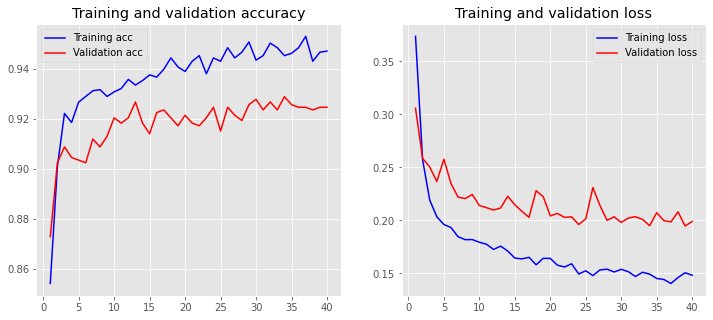

In [49]:
plot_history(history)

# ANN with Demographic data only

In [ ]:
from sklearn.model_selection import train_test_split

num_classes=2
y=data['CountyOutcome'].values.tolist()
y = keras.utils.to_categorical(y, num_classes)
X = data.drop(['CountyOutcome','Unnamed: 0','tSentiment','cSentiment'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle =True, random_state=4221)
print("X_train shape {}, X_test shape {}, y_train shape {}, y_test shape {}".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

X_train shape (2199, 20), X_test shape (943, 20), y_train shape (2199, 2), y_test shape (943, 2)


In [ ]:

finalmodel2 = Sequential()

finalmodel2.add(Dense(50, input_shape=(20,), kernel_regularizer = regularizers.l2(0.0001), kernel_initializer='glorot_uniform' , activation='relu'))
finalmodel2.add(Dropout(0.2))
finalmodel2.add(Dense(50, kernel_regularizer = regularizers.l2(0.0001), kernel_initializer='glorot_uniform' ,activation='relu'))
finalmodel2.add(Dropout(0.2))
finalmodel2.add(Dense(num_classes,  kernel_regularizer = regularizers.l2(0.0001), activation='sigmoid'))
finalmodel2.compile(loss="binary_crossentropy", optimizer='Adam', metrics=['accuracy', f1_m, precision_m, recall_m, specificity])
finalmodel2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 50)                1050      
_________________________________________________________________
dropout_10 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 50)                2550      
_________________________________________________________________
dropout_11 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 2)                 102       
Total params: 3,702
Trainable params: 3,702
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history2 = finalmodel2.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 40, batch_size = 10,  verbose = 1)

score2 = finalmodel2.evaluate(X_test, y_test, batch_size = 10, verbose = 1)

loss, accuracy, f1_score, precision, recall, specificity = finalmodel2.evaluate(X_test, y_test, verbose=1)

print("Test accuracy is {}".format(score2[1]))
print("Test f1 score is {}".format(f1_score))
print("Test precision is {}".format(precision))
print("Test sensitivity is {}".format(recall))
print("Test specificity is {}".format(specificity))

Epoch 1/40
220/220 [==============================] - 1s 4ms/step - loss: 0.4118 - accuracy: 0.8481 - f1_m: 0.8434 - precision_m: 0.8445 - recall_m: 0.8440 - specificity: 0.8431 - val_loss: 0.3203 - val_accuracy: 0.8558 - val_f1_m: 0.8506 - val_precision_m: 0.8526 - val_recall_m: 0.8488 - val_specificity: 0.8530
Epoch 2/40
220/220 [==============================] - 0s 2ms/step - loss: 0.2639 - accuracy: 0.8963 - f1_m: 0.8964 - precision_m: 0.8978 - recall_m: 0.8954 - specificity: 0.8977 - val_loss: 0.2700 - val_accuracy: 0.8876 - val_f1_m: 0.8864 - val_precision_m: 0.8869 - val_recall_m: 0.8860 - val_specificity: 0.8870
Epoch 3/40
220/220 [==============================] - 0s 2ms/step - loss: 0.2264 - accuracy: 0.9145 - f1_m: 0.9127 - precision_m: 0.9139 - recall_m: 0.9122 - specificity: 0.9131 - val_loss: 0.2636 - val_accuracy: 0.8971 - val_f1_m: 0.8955 - val_precision_m: 0.8956 - val_recall_m: 0.8954 - val_specificity: 0.8954
Epoch 4/40
220/220 [==============================] - 0s 2

In [ ]:
predictions = finalmodel2.predict(X_test)
import sklearn
import numpy as np

cm = sklearn.metrics.confusion_matrix(y_test.argmax(axis=1), predictions.argmax(axis=1))
print(cm)

[[118  35]
 [ 38 752]]


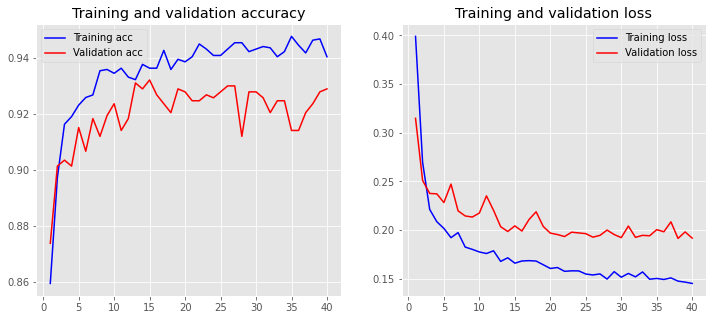

In [ ]:
plot_history(history2)